# Eigen Cation

## 1. Install and Satisfy requirements

See [documenstaion](https://kenhino.github.io/PyVibLocalizer/README.html).

## 2. Import modules

In [14]:
import mendeleev
import numpy as np
import scipy

In [15]:
try:
    import bpy
except ImportError:
    print('You cannot use Blender in Jupyter')
    print('You must select jupyter kernel as blender when you use blender')
    import mendeleev
import matplotlib
try:
    import ase
    import ase.db
except ImportError:
    print('You cannot use ASE')

In [16]:
try:
    import pyvib
except ImportError:
    print('Try execute in `src` directory or set $PYTHONPATH to pyvib')

## 3. Prepare Geometry
Define
- atom element
- coordinate

For example,
```python
geom = [['C', (0.0, 0.0, 0.0)],
        ['H', (1,0, 1.0, 1.0)]]
```

Here, I use pre-calculated coordinate.

In [17]:
geom, mw_hess = pyvib.read_fchk_g16('./sample/eigen.fchk')

In [18]:
geom

[['O', (-4.57284776, 0.68207695, 0.320466621)],
 ['H', (-5.8818443, 0.81739346, -0.957684805)],
 ['H', (-5.14539881, 1.7229147, 1.71690376)],
 ['O', (2.87724227, 3.61878313, 0.32033963)],
 ['H', (3.64938057, 4.68466587, -0.957609826)],
 ['H', (4.06472225, 3.59373265, 1.71693115)],
 ['O', (-0.000131179955, -2.09370874e-06, -1.06839293)],
 ['H', (-1.80158403, 0.354774491, -0.473124045)],
 ['H', (1.20781297, 1.38299864, -0.473643077)],
 ['H', (0.593629706, -1.73762711, -0.473567918)],
 ['O', (1.69577339, -4.30083358, 0.320266918)],
 ['H', (2.23110504, -5.50313834, -0.957754266)],
 ['H', (1.08188283, -5.31590964, 1.71810709)]]

## 4. Prepare mass-weighted hessian

Define
- mass-weighted hessian (unit is a.u.)

Mass-weighted hessian is matrix $M_{ij}=\frac{\partial^2 E}{\partial\sqrt{m_i}x_i\partial\sqrt{m_j}x_j}$ of the second derivative of energy $E$ in terms of mw coordinates $\sqrt{m_i}x_i$. You can also obtain mw-hessian from harmonic frequency and displacement vectors.

You can use `pyvib.read_minfo()` for [SINDO](https://tms.riken.jp/research/software/sindo/) or `pyvib.read_fchk_g16()` for [Gaussian16](https://gaussian.com/gaussian16/)

In [19]:
mw_hess

array([[ 1.41484739e-05, -4.97294794e-06,  4.09174906e-06, ...,
        -6.59478331e-08,  1.63602856e-08,  5.23460516e-08],
       [-4.97294794e-06,  6.50689658e-06,  7.07259661e-06, ...,
        -5.66803626e-08,  1.57047551e-08, -1.80738323e-08],
       [ 4.09174906e-06,  7.07259661e-06,  1.97896594e-05, ...,
         4.37221135e-08, -4.17185718e-08, -4.92465196e-08],
       ...,
       [-6.59478331e-08, -5.66803626e-08,  4.37221135e-08, ...,
         3.50157237e-05,  4.45433319e-05, -7.70477604e-05],
       [ 1.63602856e-08,  1.57047551e-08, -4.17185718e-08, ...,
         4.45433319e-05,  9.96013363e-05, -1.05977045e-04],
       [ 5.23460516e-08, -1.80738323e-08, -4.92465196e-08, ...,
        -7.70477604e-05, -1.05977045e-04,  1.77547721e-04]])

In [20]:
mw_hess.shape

(39, 39)

## 5. Set PyViblocalizer
- Set geometry and (hessian or (displacement vector and frequency))
- Input units can be specified in options, such as `unit_mass='AMU'` 

In large system, it may takes a few minutes

In [21]:
vib = pyvib.Vibration(geom, mw_hess=np.array(mw_hess), 
                      unit_xyz='bohr', unit_mass='a.u.')
import units
np.array(vib.freq) / units.CM1

array([  62.46777515,   62.50338745,   68.72829256,  109.25736945,
        109.82763025,  129.57375744,  264.56181526,  288.31317567,
        288.52291228,  298.66971582,  344.55689857,  344.66105117,
        378.31045369,  378.36290939,  417.17730758,  718.2188798 ,
        952.05647715,  952.35728257, 1259.77733147, 1627.31905123,
       1627.3804873 , 1646.09159694, 1694.15410807, 1694.26438307,
       2826.32660702, 2826.60781382, 2971.59255456, 3753.81345625,
       3753.89343548, 3754.95980133, 3843.69364841, 3843.7694223 ,
       3844.15796642])

## 7. Localization

## 7.1 Group Localization

In [22]:
#disp, freq = vib.group_localize(domain=[[0,1,2],[3,4,5],[6,7,8,9],[10,11,12]], mw_hess=np.array(mw_hess), unit_mass='a.u.')
disp, freq = vib.group_localize(domain=[[0,1,2],[3,4,5],[7,8,9],[10,11,12]], mw_hess=np.array(mw_hess), unit_mass='a.u.')
#disp, freq = vib.group_localize(domain=[[0,1,2,3,4,5,6,7,8,9,10,11,12]], mw_hess=np.array(mw_hess), unit_mass='a.u.')
print(np.array(disp))
print(np.array(freq) / units.CM1)
np.save('freq_au_local', np.array(freq))
np.save('disp_au_local', np.array(disp))

[[-0.00104128  0.00180834 -0.00480874 ...  0.          0.
   0.        ]
 [ 0.00108025  0.00494462  0.0014723  ...  0.          0.
   0.        ]
 [ 0.00015627 -0.00034635  0.00024763 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.00384483 -0.01311051
  -0.00797595]
 [ 0.          0.          0.         ... -0.00526533 -0.00786948
   0.01226098]
 [ 0.          0.          0.         ... -0.00551773 -0.00915319
   0.01263433]]
[  63.67649547   66.07522249  117.97520869  250.91099606  294.9822215
  483.2269118  1647.52174102 3753.56062009 3843.89576765   63.59432018
   66.06351984  117.16697684  250.91440392  294.6397502   483.13707838
 1647.47433911 3753.43864123 3843.7944947     0.            0.
    0.          709.60487088  897.05815149  897.36149363 1188.36085468
 1646.20570989 1646.3580958  2685.7261758  2686.02381528 2947.92921184
   63.589813     66.0647981   117.7300939   250.97918657  294.83234861
  483.30125022 1647.49286545 3753.54857334 3

In [23]:
try:
    import bpy
    vib.visualize(blender=True, arrow_scale=100.0)
except ImportError:
    vib.visualize(blender=False)

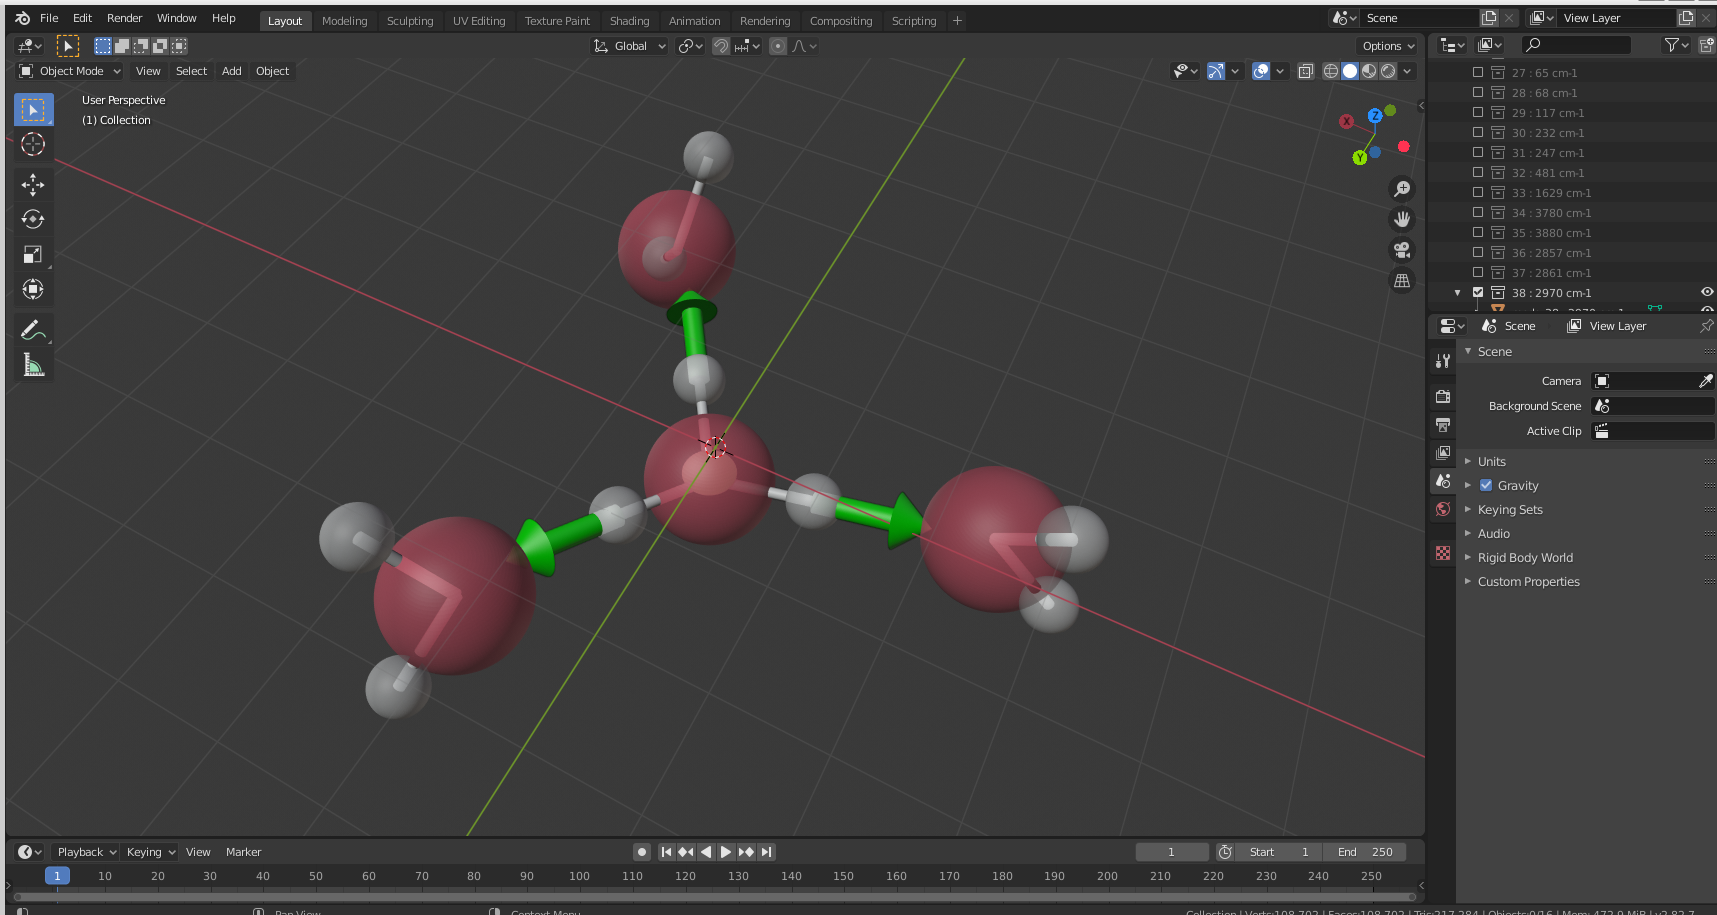